In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
df=pd.read_csv('graduate-admissions/Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df1.shape

(500, 9)

In [22]:
df.isnull().values.any()

False

**We do not have any null values in this dataset**

In [23]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

### Drop the redundant Variable

**Here we see that the variable *Serial No* seems to be redundant so we can drop it**.

In [20]:
df=df.drop('Serial No.',axis=1)

In [21]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Let us discribe the data more

In [24]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## EDA

**Distribution of the variables**

Text(0.5, 1.0, 'Distribution of GRE Score')

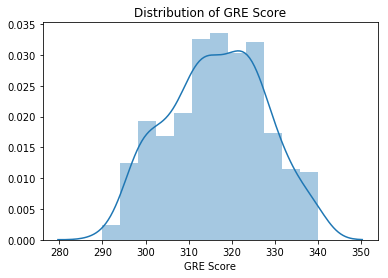

In [28]:
sns.distplot(df['GRE Score'])
plt.title('Distribution of GRE Score')

Text(0.5, 1.0, 'Distribution of TOEFL Score')

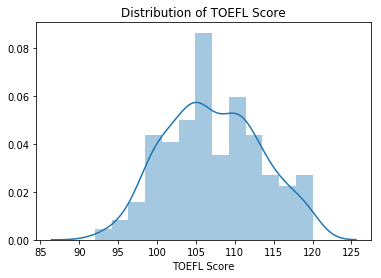

In [30]:
sns.distplot(df['TOEFL Score'])
plt.title('Distribution of TOEFL Score')

Text(0.5, 1.0, 'Distribution of University Rating')

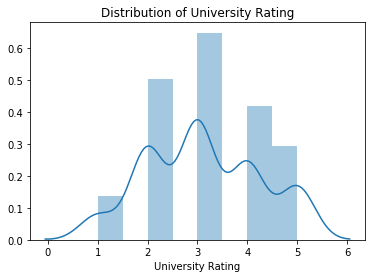

In [31]:
sns.distplot(df['University Rating'])
plt.title('Distribution of University Rating')

Text(0.5, 1.0, 'Distribution of Statement of Purpose Ratings')

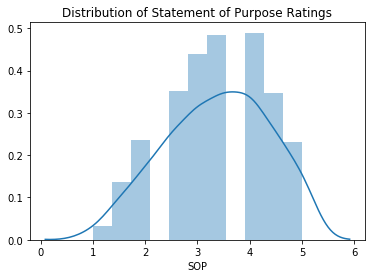

In [42]:
sns.distplot(df.SOP)
plt.title('Distribution of Statement of Purpose Ratings')

Text(0.5, 1.0, 'Distribution of CGPA')

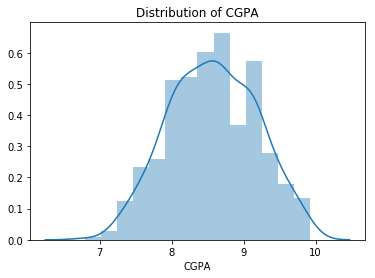

In [38]:
sns.distplot(df['CGPA'])
plt.title('Distribution of CGPA')

Text(0.5, 1.0, 'Distribution of Later of Recomandation Ratings')

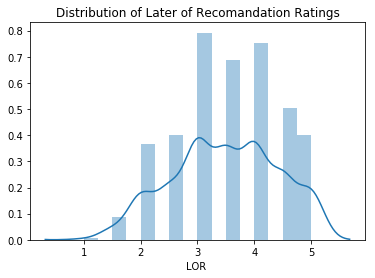

In [45]:
sns.distplot(df['LOR '])
plt.title('Distribution of Later of Recomandation Ratings')

In [41]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


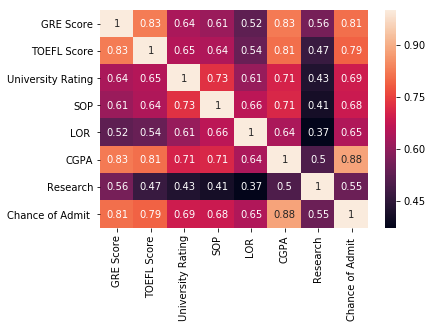

In [40]:
sns.heatmap(df.corr(),annot=True)

Text(0.5, 1.0, 'Relationship between GRE and TOEFL Score')

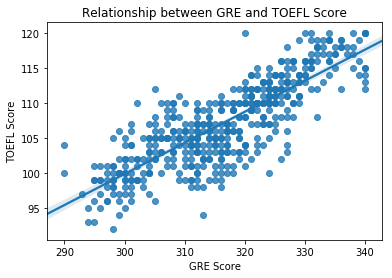

In [43]:
sns.regplot(x=df['GRE Score'],y=df['TOEFL Score'])
plt.title('Relationship between GRE and TOEFL Score')

**We Can see That students having higher GRE Score will have Higher TOEFL**.


Text(0.5, 1.0, 'Relationship between CGPA and GRE Score')

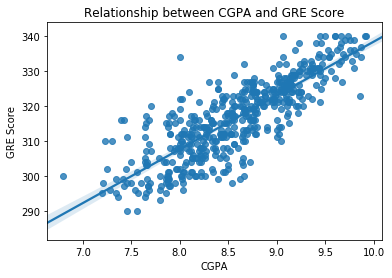

In [44]:
sns.regplot(x=df['CGPA'],y=df['GRE Score'])
plt.title('Relationship between CGPA and GRE Score')

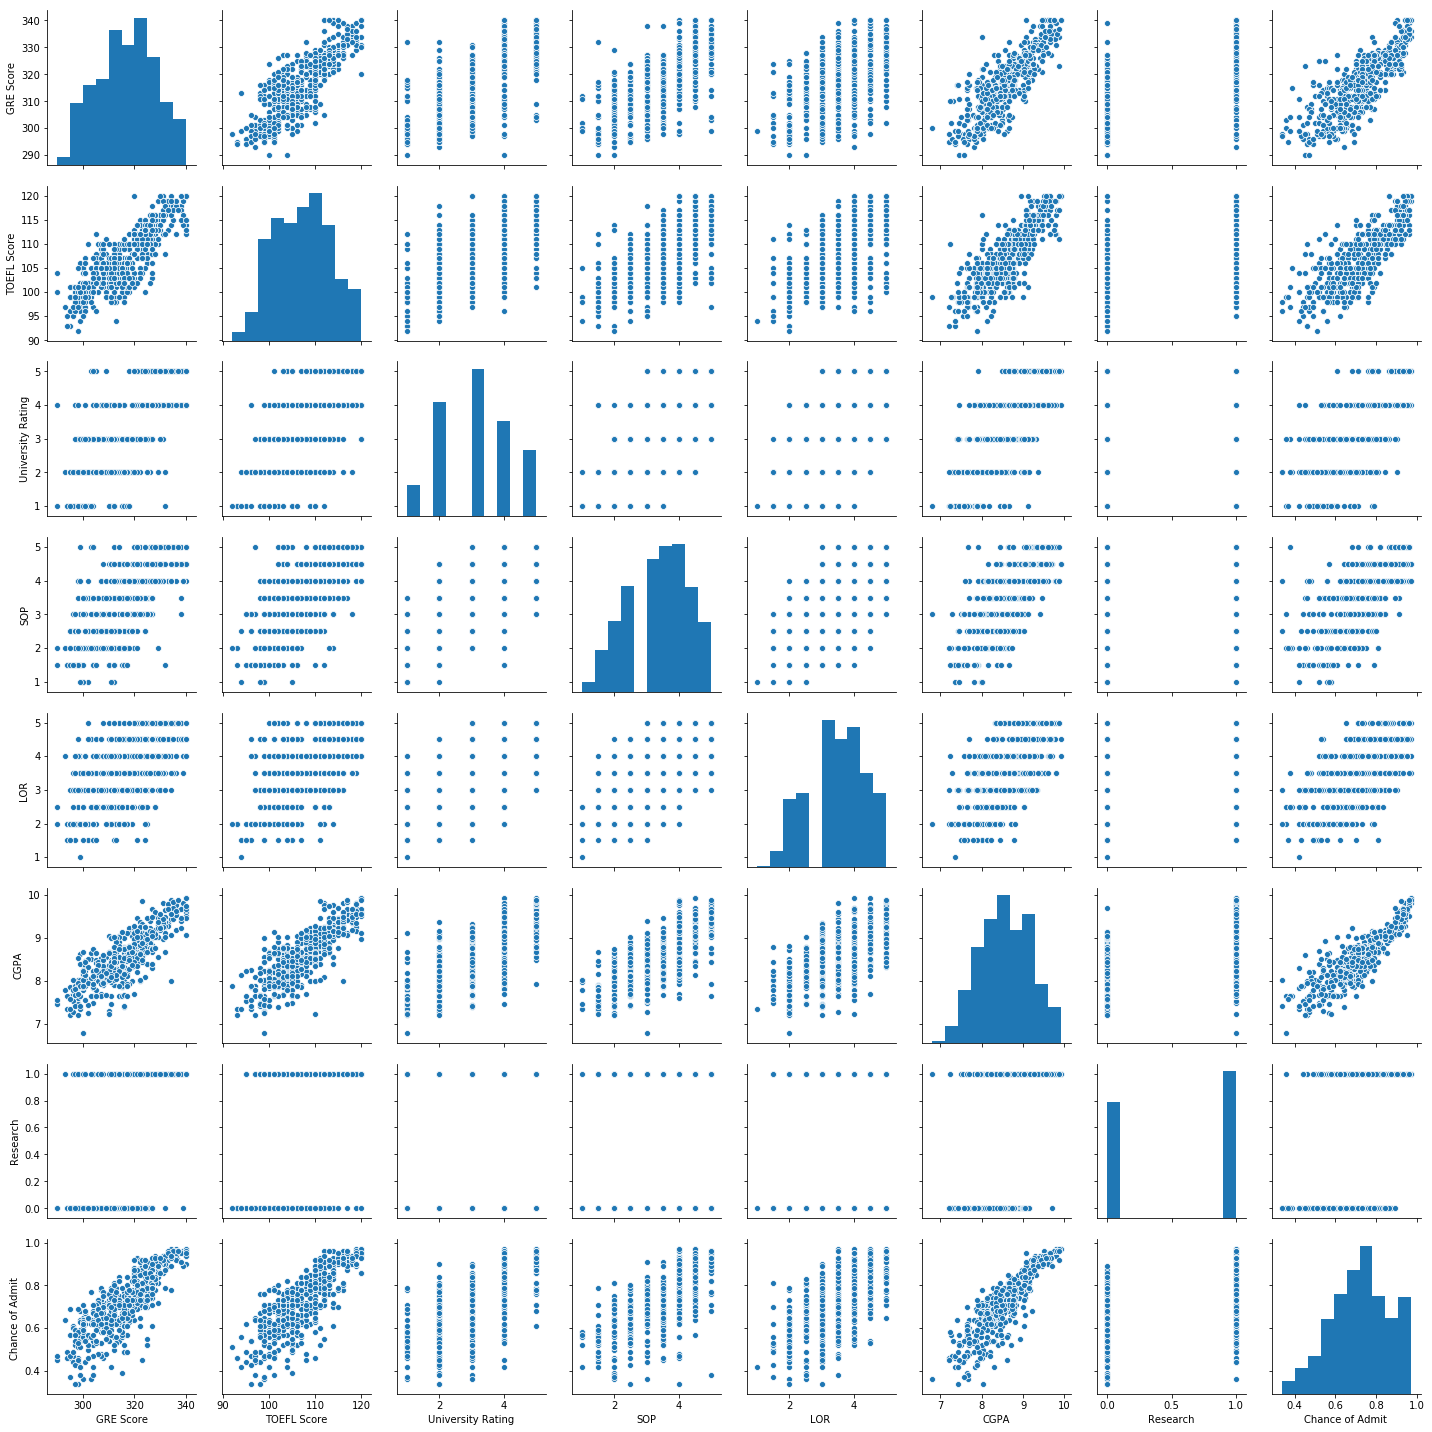

In [46]:
sns.pairplot(df)

Splitting The Data into training and Testing set

In [47]:
from sklearn.model_selection import train_test_split

In [94]:
X=np.array(df.drop('Chance of Admit ',axis=1).values)
Y=np.array(df['Chance of Admit '].values)

In [104]:
X.shape,Y.shape

((500, 7), (500,))

In [162]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [163]:
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
Y_train=Y_train.to_numpy().reshape(400,)
Y_test=Y_test.to_numpy().reshape(100,)

In [160]:
X_train.shape

(400, 7)

In [161]:
X_test.shape

(100, 7)

**Test of Algorithms' perfomance**

In [157]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso,Ridge,LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [158]:
models_frame = [['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor()],
           ['Xgboost: ', XGBRegressor()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()]]


In [164]:
for name,model in models_frame:
    model = model
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(Y_test, predictions))))

Linear Regression : 0.06387237301527249


C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForest : 0.06877993893571002
[19:17:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost:  0.06556169693237386
Lasso:  0.11378366464956309
Ridge:  0.06394657764105444


**We Can see In this Case *Linear Regression*  Model performs better that other Regression models**.

In [173]:
model = LinearRegression()
model.fit(X_train,Y_train)
inputFeature=np.array([230,118,4,4.5,4.5,7.65,0])
predictions = model.predict([inputFeature])
predictions[0]

0.471810853515513

### Model Cross Validation

In [129]:
scores = cross_val_score(model, X, Y, cv=5)
scores.mean()

0.8108015220863883

### Saving Pickle File

In [130]:
import pickle as pkl

In [132]:
with open('model.pkl','wb') as file:
    pkl.dump(model,file)